## Introduction to Seaborn & the Dataset

We'll explore how to quickly create multiple plots that are subsetted using one or more conditions. We'll be working with the __seaborn__ visualization library, which is built on top of matplotlib. Seaborn has good support for more complex plots, attractive default styles, and integrates well with the pandas library.

__Data:__ We'll be working with a data set of the passengers of the Titanic. The <a href="https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic">Titanic shipwreck</a> is the most famous shipwreck in history and led to the creation of better safety regulations for ships. One substantial safety issue was that there were not enough lifeboats for every passenger on board, which meant that some passengers were prioritized over others to use the lifeboats.

__Source:__ The data set was compiled by Kaggle for their introductory data science competition, called __Titanic: Machine Learning from Disaster.__ You can download the data from <a href="https://www.kaggle.com/c/titanic/data">here</a>

The data for the passengers is contained in two files:
- `train.csv`: Contains data on 712 passengers
- `test.csv`: Contains data on 418 passengers

Here are descriptions for each of the columns in train.csv:
- `PassengerId` -- A numerical id assigned to each passenger.
- `Survived` -- Whether the passenger survived (1), or didn't (0).
- `Pclass` -- The class the passenger was in.
- `Name` -- the name of the passenger.
- `Sex` -- The gender of the passenger -- male or female.
- `Age` -- The age of the passenger. Fractional.
- `SibSp` -- The number of siblings and spouses the passenger had on board.
- `Parch` -- The number of parents and children the passenger had on board.
- `Ticket` -- The ticket number of the passenger.
- `Fare` -- How much the passenger paid for the ticket.
- `Cabin` -- Which cabin the passenger was in.
- `Embarked` -- Where the passenger boarded the Titanic.

In [1]:
# Import Libraries
import pandas as pd

In [2]:
cols = ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

titanic = pd.read_csv('data/titanic-train.csv', usecols=cols)
titanic = titanic.dropna(axis=0, how='any')

### Creating Histograms In Seaborn

Seaborn works similarly to the `pyplot` module from matplotlib. We primarily use seaborn interactively, by calling functions in its top level namespace. Like the `pyplot` module from matplotlib, seaborn creates a matplotlib figure or adds to the current, existing figure each time we generate a plot. When we're ready to display the plots, we call `pyplot.show()`.

To get familiar with seaborn, we'll start by creating the familiar histogram. We can generate a histogram of the `Fare` column using the `seaborn.distplot()` function:
```
import seaborn as sns    # seaborn is commonly imported as `sns`
import matplotlib.pyplot as plt
sns.distplot(titanic["Fare"])
plt.show()
```
Under the hood, seaborn creates a histogram using matplotlib, scales the axes values, and styles it. In addition, seaborn uses a technique called _kernel density estimation_, or _KDE_ for short, to create a smoothed line chart over the histogram.
- Kernel density plots are especially helpful when we're comparing distributions

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

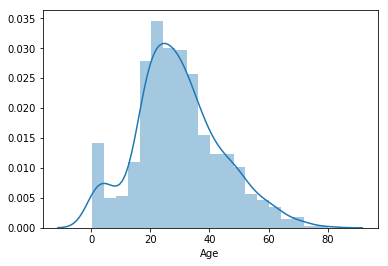

In [4]:
sns.distplot(titanic['Age'])
plt.show()

### Generating A Kernel Density Plot

To generate just the kernel density plot, we use the `seaborn.kdeplot()` function:
```
sns.kdeplot(titanic["Age"])
```
While the distribution of data is displayed in a smoother fashion, it's more difficult to visually estimate the area under the curve using just the line chart. With the histogram, the bars provided a way to understand and compare proportions visually.

To bring back some of the ability to easily compare proportions, we can shade the area under the line using a single color. When calling the `seaborn.kdeplot()` function, we can shade the area under the line by setting the `shade` parameter to `True`.

Text(0.5, 0, 'Age')

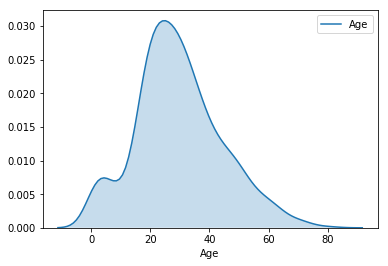

In [5]:
sns.kdeplot(titanic['Age'], shade=True)
plt.xlabel("Age")

The default seaborn style sheet gets some things right, like hiding axis ticks, and some things wrong, like displaying the coordinate grid and keeping all of the axis spines. We can use the `seaborn.set_style()` function to change the default seaborn style sheet.

### Modifying The Appearance Of The Plots

Seaborn comes with a few style sheets:
- darkgrid: Coordinate grid displayed, dark background color
- whitegrid: Coordinate grid displayed, white background color
- dark: Coordinate grid hidden, dark background color
- white: Coordinate grid hidden, white background color
- ticks: Coordinate grid hidden, white background color, ticks visible

Here's a diagram that compares the same plot across all styles:

<img src="_images/seaborn_all_styles.png" />

By default, the seaborn style is set to `"darkgrid"`:
```
sns.set_style("darkgrid")
```
If we change the style sheet using this method, all future plots will match that style in your current session. This means you need to set the style before generating the plot.

To remove the axis spines for the top and right axes, we use the `seaborn.despine()` function:
```
sns.despine()
```
By default, only the `top` and `right` axes will be __despined__, or have their spines removed. To despine the other two axes, we need to set the `left` and `bottom` parameters to `True`.

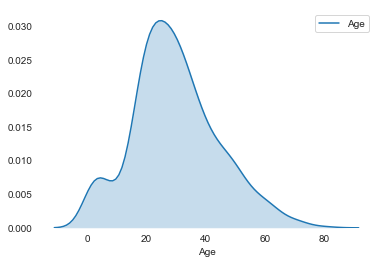

In [6]:
sns.set_style("white")
sns.kdeplot(titanic['Age'], shade=True)
plt.xlabel("Age")
sns.despine(left=True, bottom=True)

### Conditional Distributions Using A Single Condition

In seaborn, we can create a small multiple by specifying the conditioning criteria and the type of data visualization we want. For example, we can visualize the differences in age distributions between passengers who survived and those who didn't by creating a pair of kernel density plots. One kernel density plot would visualize the distribution of values in the `"Age"` column where `Survived` equalled `0` and the other would visualize the distribution of values in the `"Age"` column where `Survived` equalled `1`.

Here's what those plots look like:
<img src="_images/seaborn_simple_conditional.png" />

The code to generate the pair of plots, is short and sweet:
```
# Condition on unique values of the "Survived" column.
g = sns.FacetGrid(titanic, col="Survived", size=6)
# For each subset of values, generate a kernel density plot of the "Age" columns.
g.map(sns.kdeplot, "Age", shade=True)
```
Seaborn handled:
- subsetting the data into rows where Survived is 0 and where Survived is 1
- creating both Axes objects, ensuring the same axis scales
- plotting both kernel density plots

The `seaborn.FacetGrid` object is used to represent the layout of the plots in the grid and the columns used for subsetting the data. The word "facet" from `FacetGrid` is another word for "subset". Setting the `col` parameter to `"Survived"` specifies a separate plot for each unique value in the `Survived` column. Setting the `size` parameter to `6` specifies a height of 6 inches for each plot.

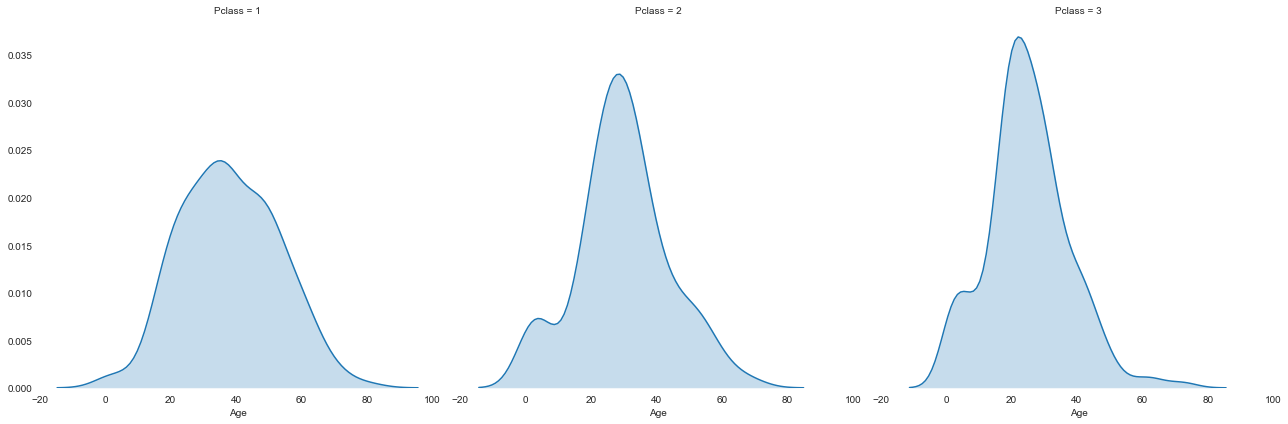

In [8]:
# Condition on unique values of the "Pclass" column.
g=sns.FacetGrid(titanic, col="Pclass", height=6)
# For each subset of values, generate a kernel density plot of the "Age" columns.
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)

### Creating Conditional Plots Using Two Conditions

When creating a `FacetGrid`, we use the `row` parameter to specify the column in the dataframe we want used to subset across the rows in the grid.

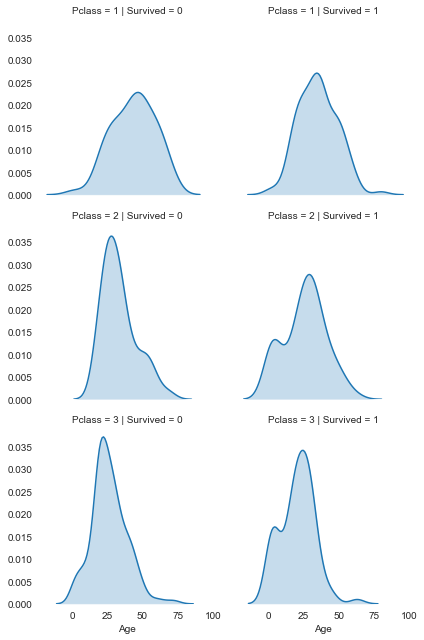

In [9]:
g=sns.FacetGrid(titanic, row='Pclass', col='Survived')
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

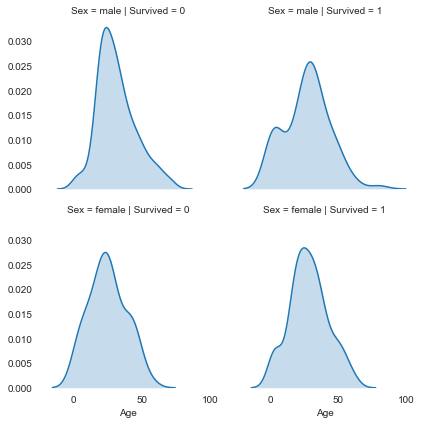

In [10]:
g = sns.FacetGrid(titanic, row='Sex', col='Survived')
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

### Creating Conditional Plots Using Three Conditions

When subsetting data using two conditions, the rows in the grid represented one condition while the columns represented another. We can express a third condition by generating multiple plots on the same subplot in the grid and color them differently. Thankfully, we can add a condition just by setting the `hue` parameter to the column name from the dataframe.

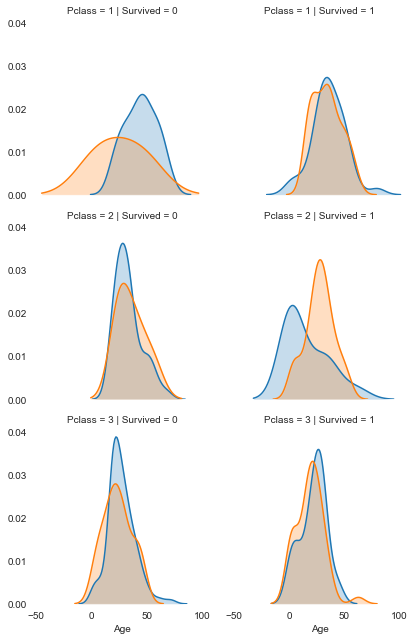

In [11]:
g = sns.FacetGrid(titanic, row='Pclass', col='Survived', hue='Sex', height=3)
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

### Adding A Legend

Now that we're coloring plots, we need a legend to keep track of which value each color represents.

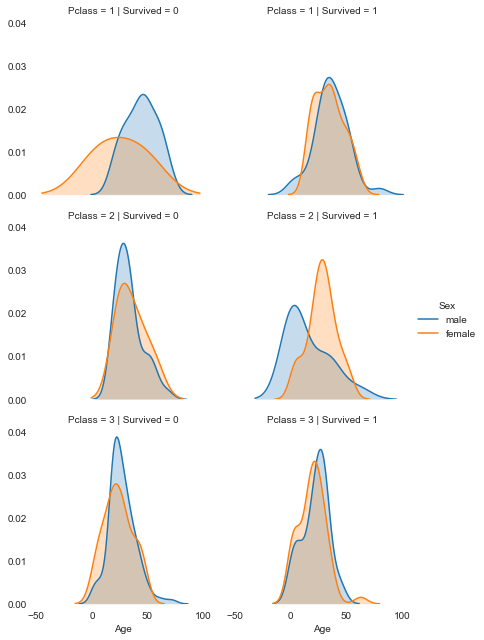

In [12]:
g = sns.FacetGrid(titanic, row='Pclass', col='Survived', hue='Sex', height=3)
g = g.map(sns.kdeplot, "Age", shade=True).add_legend()
sns.despine(left=True, bottom=True)
plt.show()

## Conclusion:

We learned how the seaborn library lets us quickly style plots and create small multiples using conditions we specify.